# 通过声音看世界：用 GPT-4V(ision) 改变视障人士的生活
本笔记本旨在提供使用 GPT-4 创建描述的代码，使用文本和视觉数据作为输入。

然后，我们使用 OpenAI 的 TTS API 将 GPT-4 中的答案转换为音频文件，并将其附加到原始视频中。

在此，我们提出一个使用案例，尝试模拟盲人在 GPT-4 引导下的环境。

### Libraries

In [4]:
import os
import utils
from IPython.display import Audio
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from dotenv import load_dotenv

load_dotenv()


True

### 视频预处理
1. 剪切感兴趣的视频
2. 转换为 base64
3. 渲染最终视频

INFO:root:1081, frames read.


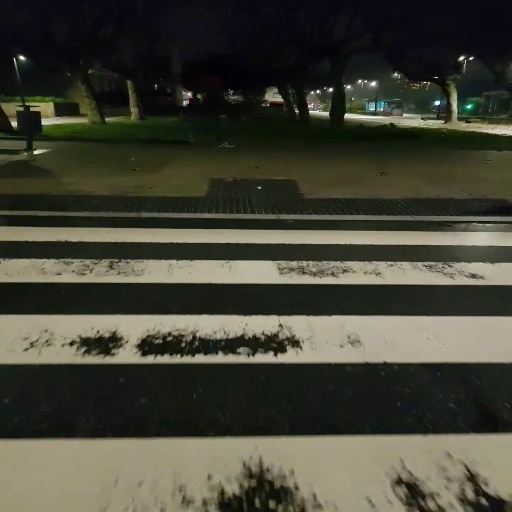

In [2]:
# cut video from 29 to 65
ffmpeg_extract_subclip("data/all_video.mp4", 29, 65, targetname="data/video.mp4")

# create list with base 64 resized frames (512, 512) to avoid exceeding OpenAI token limit
base64Frames = utils.convert_frames_to_base64("data/video.mp4", (512, 512))

# watch final video
utils.render_video(base64Frames)

### 使用 OpenAI API 向 GPT-4V（ision）发送视频和提示信息

In [4]:
description = utils.get_description(
    prompt="These are frames from a person walking. Narrate succinctly with short sentences like they do in GPS devices the elements and obstacles around you to help a blind person go through.",
    frame_list=base64Frames,
    frame_interval=100,
    open_ai_key=os.getenv("OPENAI_API_KEY"),
    max_tokens=350
)

INFO:root:Walk straight on a textured pathway, keep the building to your right.
Continue forward with slight curve to the right.
Stay straight, small overhang ahead on your right.
Proceed, passing the overhang, continue on flat path.
Straight ahead, approaching a well-lit area.
After well-lit area, transition onto patterned pavement.
Follow the tiled pavement with guiding lines straight ahead.
Continue under the passageway, keeping the pillars parallel to you.
Move through passageway, slight descent ahead.
Pathway ends, prepare to stop at pedestrian crossing.
Stand at crosswalk, wait for audible signal to cross the street.


### 根据 GPT-4V(ision) 输出创建音频

In [7]:
audio = utils.transform_text_to_speech(
    description=description,
    open_ai_key=os.getenv("OPENAI_API_KEY"),
    model="tts-1",
    voice="fable",
    save_path="audio.mp3"
)

# render audio
Audio(audio)

### 合并音频和视频并保存最终片段

In [ ]:
utils.attach_audio_to_video("data/audio.mp3", "data/video.mp4", "data/video_audio.mp4")